In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/KaggleV2-May-2016.csv")

df["ScheduledDT"] = pd.to_datetime(df["ScheduledDay"].astype(str).str.replace("Z","", regex=False), errors="coerce")
df["AppointmentDT"] = pd.to_datetime(df["AppointmentDay"].astype(str).str.replace("Z","", regex=False), errors="coerce")
df["NoShow"] = (df["No-show"] == "Yes")

print("Data shape:", df.shape)
print(df[["ScheduledDT", "AppointmentDT","NoShow"]].head())

Data shape: (110527, 17)
          ScheduledDT AppointmentDT  NoShow
0 2016-04-29 18:38:08    2016-04-29   False
1 2016-04-29 16:08:27    2016-04-29   False
2 2016-04-29 16:19:04    2016-04-29   False
3 2016-04-29 17:29:31    2016-04-29   False
4 2016-04-29 16:07:23    2016-04-29   False


In [4]:
bins = [0, 12, 18, 30, 45, 60, 100]
labels = ["Child (0-12)", "Teen (13-18)", "Young Adult (19-30)", "Adult (31-45)", "Middle Age (46-60)", "Senior (60+)"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)
df["AgeGroup"].value_counts()

AgeGroup
Middle Age (46-60)     23179
Adult (31-45)          21954
Senior (60+)           19755
Child (0-12)           17497
Young Adult (19-30)    16765
Teen (13-18)            7830
Name: count, dtype: int64

In [7]:
demographic_summary = (
    df.groupby(["Gender", "AgeGroup"], observed=False)
        .agg(Appointments=("NoShow", "size"),
             NoShows=("NoShow","sum"))
        .assign(NoShowRate=lambda t: t["NoShows"]/t["Appointments"])
        .reset_index()
)

demographic_summary

,Gender,AgeGroup,Appointments,NoShows,NoShowRate
0,F,Child (0-12),8301,1731,0.208529
1,F,Teen (13-18),4932,1260,0.255474
2,F,Young Adult (19-30),12417,3096,0.249336
3,F,Adult (31-45),15383,3284,0.213482
4,F,Middle Age (46-60),15811,2828,0.178863
5,F,Senior (60+),13267,2073,0.156252
6,M,Child (0-12),9196,1937,0.210635
7,M,Teen (13-18),2898,780,0.269151
8,M,Young Adult (19-30),4348,1047,0.240800
9,M,Adult (31-45),6571,1408,0.214275


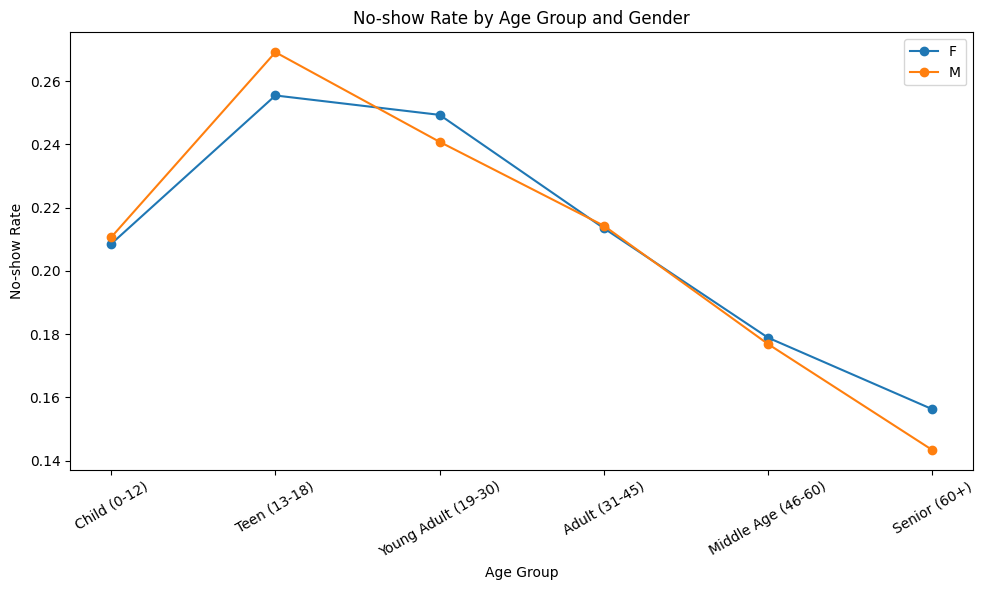

In [13]:
plt.figure(figsize=(10,6))

for gender in df["Gender"].unique():
    subset = demographic_summary[demographic_summary["Gender"] == gender]
    plt.plot(subset["AgeGroup"].astype(str), subset["NoShowRate"], marker="o", label=f"{gender}")

plt.title("No-show Rate by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("No-show Rate")
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()

os.makedirs("../assets", exist_ok=True)
plt.savefig("../assets/no_show_rate_by_age_gender.png", dpi=150, bbox_inches="tight")
plt.show()

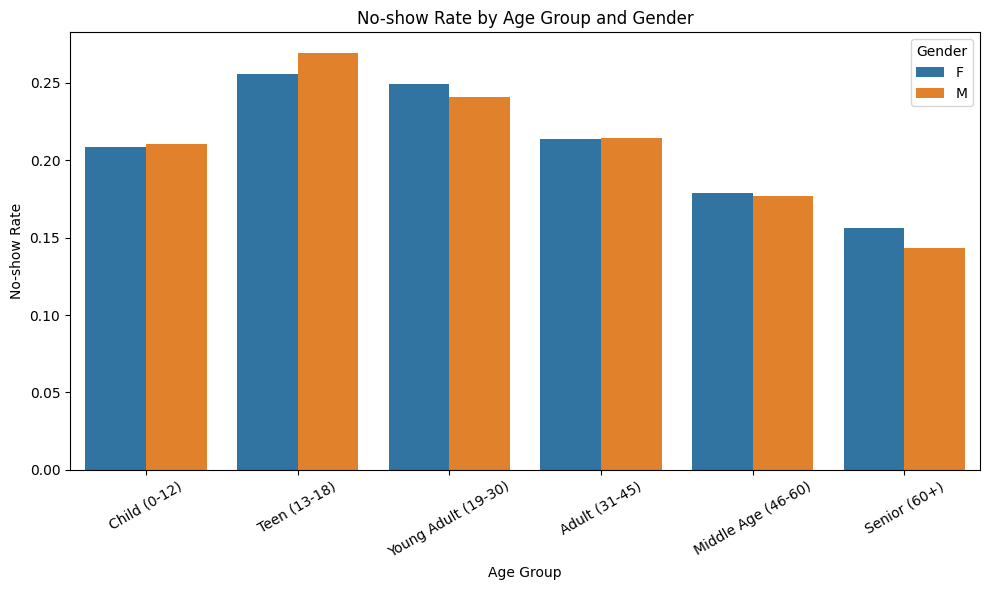

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=demographic_summary, x="AgeGroup", y="NoShowRate", hue="Gender")

plt.title("No-show Rate by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("No-show Rate")
plt.legend(title="Gender")
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("../assets/no_show_rate_by_age_gender_bar.png", dpi=150, bbox_inches="tight")
plt.show()

In [22]:
os.makedirs("../data/processed", exist_ok=True)
demographic_summary.to_csv("../data/processed/demographic_noshow_summary.csv", index=False)
print("Saved demogrpahic summary")

Saved demogrpahic summary
